In [1]:
import pandas as pd
import numpy as np
import math

In [34]:
nsrdb_metadata_2012 = pd.read_csv('NSRDB/267477_49.65_-124.78_2012.csv', nrows=1).T
nsrdb_metadata_2013 = pd.read_csv('NSRDB/267477_49.65_-124.78_2013.csv', nrows=1).T
nsrdb_metadata_2014 = pd.read_csv('NSRDB/267477_49.65_-124.78_2014.csv', nrows=1).T
nsrdb_metadata_2015 = pd.read_csv('NSRDB/267477_49.65_-124.78_2015.csv', nrows=1).T
nsrdb_metadata_2016 = pd.read_csv('NSRDB/267477_49.65_-124.78_2016.csv', nrows=1).T
nsrdb_metadata_2017 = pd.read_csv('NSRDB/267477_49.65_-124.78_2017.csv', nrows=1).T
nsrdb_metadata_2018 = pd.read_csv('NSRDB/267477_49.65_-124.78_2018.csv', nrows=1).T
nsrdb_metadata_2019 = pd.read_csv('NSRDB/267477_49.65_-124.78_2019.csv', nrows=1).T
nsrdb_metadata_2020 = pd.read_csv('NSRDB/267477_49.65_-124.78_2020.csv', nrows=1).T

In [13]:
nsrdb_2012 = pd.read_csv('NSRDB/267477_49.65_-124.78_2012.csv', skiprows=2)
nsrdb_2013 = pd.read_csv('NSRDB/267477_49.65_-124.78_2013.csv', skiprows=2)
nsrdb_2014 = pd.read_csv('NSRDB/267477_49.65_-124.78_2014.csv', skiprows=2)
nsrdb_2015 = pd.read_csv('NSRDB/267477_49.65_-124.78_2015.csv', skiprows=2)
nsrdb_2016 = pd.read_csv('NSRDB/267477_49.65_-124.78_2016.csv', skiprows=2)
nsrdb_2017 = pd.read_csv('NSRDB/267477_49.65_-124.78_2017.csv', skiprows=2)
nsrdb_2018 = pd.read_csv('NSRDB/267477_49.65_-124.78_2018.csv', skiprows=2)
nsrdb_2019 = pd.read_csv('NSRDB/267477_49.65_-124.78_2019.csv', skiprows=2)
nsrdb_2020 = pd.read_csv('NSRDB/267477_49.65_-124.78_2020.csv', skiprows=2)
nsrdb_2016.iloc[:10,:10]

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI
0,2016,1,1,0,0,0,0,0,0,0
1,2016,1,1,0,30,0,0,0,0,0
2,2016,1,1,1,0,0,0,0,0,0
3,2016,1,1,1,30,0,0,0,0,0
4,2016,1,1,2,0,0,0,0,0,0
5,2016,1,1,2,30,0,0,0,0,0
6,2016,1,1,3,0,0,0,0,0,0
7,2016,1,1,3,30,0,0,0,0,0
8,2016,1,1,4,0,0,0,0,0,0
9,2016,1,1,4,30,0,0,0,0,0


In [14]:
nsrdb_2016.iloc[:10,10:]

,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Unnamed: 24
0,0,3,-6,153.02,0,0.012,1.2,0.405,123.9,76.42,-1,1030,0.0,0.0,NaN
1,0,1,-6,153.34,0,0.012,1.1,0.405,123.9,76.41,-1,1030,0.0,0.0,NaN
2,0,2,-6,152.37,0,0.012,1.1,0.406,122.9,77.53,-1,1030,0.0,0.0,NaN
3,0,2,-6,150.25,0,0.012,1.1,0.407,122.9,77.52,-1,1030,0.0,0.0,NaN
4,0,2,-6,147.22,0,0.012,1.1,0.408,116.1,78.52,-1,1030,0.0,0.0,NaN
5,0,2,-6,143.51,0,0.012,1.1,0.409,116.1,78.51,-1,1030,0.0,0.0,NaN
6,0,4,-6,139.33,0,0.012,1.1,0.411,115.4,79.58,-1,1030,0.0,0.0,NaN
7,0,4,-6,134.85,0,0.012,1.1,0.413,115.4,79.56,-1,1030,0.0,0.0,NaN
8,0,1,-5,130.16,0,0.012,1.2,0.416,117.2,80.49,-1,1030,0.0,0.0,NaN
9,0,1,-5,125.36,0,0.012,1.2,0.419,117.2,80.47,-1,1030,0.0,0.0,NaN


### Solar

In [15]:
solar_2012 = nsrdb_2012.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2013 = nsrdb_2013.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2014 = nsrdb_2014.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2015 = nsrdb_2015.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2016 = nsrdb_2016.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2017 = nsrdb_2017.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2018 = nsrdb_2018.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2019 = nsrdb_2019.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2020 = nsrdb_2020.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]

In [19]:
solar_2012

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI
0,2012,1,1,0,0,0,0
1,2012,1,1,0,30,0,0
2,2012,1,1,1,0,0,0
3,2012,1,1,1,30,0,0
4,2012,1,1,2,0,0,0
...,...,...,...,...,...,...,...
17563,2012,12,31,21,30,0,0
17564,2012,12,31,22,0,0,0
17565,2012,12,31,22,30,0,0
17566,2012,12,31,23,0,0,0


In [20]:
solar_df = pd.concat([solar_2012, solar_2013, solar_2014, solar_2015, solar_2016, solar_2017, solar_2018, solar_2019
                     , solar_2020], ignore_index=True)
solar_df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI
0,2012,1,1,0,0,0,0
1,2012,1,1,0,30,0,0
2,2012,1,1,1,0,0,0
3,2012,1,1,1,30,0,0
4,2012,1,1,2,0,0,0
...,...,...,...,...,...,...,...
157819,2020,12,31,21,30,0,0
157820,2020,12,31,22,0,0,0
157821,2020,12,31,22,30,0,0
157822,2020,12,31,23,0,0,0


In [21]:
solar_df['timestamp'] = pd.to_datetime(solar_df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [22]:
solar_df = solar_df[['timestamp', 'GHI', 'Clearsky GHI']]

In [25]:
solar_df

,timestamp,GHI,Clearsky GHI
0,2012-01-01 00:00:00,0,0
1,2012-01-01 00:30:00,0,0
2,2012-01-01 01:00:00,0,0
3,2012-01-01 01:30:00,0,0
4,2012-01-01 02:00:00,0,0
...,...,...,...
157819,2020-12-31 21:30:00,0,0
157820,2020-12-31 22:00:00,0,0
157821,2020-12-31 22:30:00,0,0
157822,2020-12-31 23:00:00,0,0


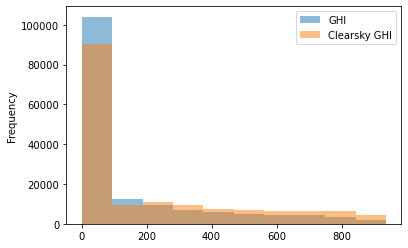

In [26]:
ax = solar_df[['GHI','Clearsky GHI']].plot.hist(alpha=0.5)

In [27]:
##  GHI values provided in the NSRDB dataset converted to KWh/m^2 from w/m^2 
solar_df['GHI_KWh'] = solar_df['GHI'] * 0.5 / 1000
solar_df['Clearsky GHI_KWh'] = solar_df['Clearsky GHI'] * 0.5 / 1000

<ipython-input-27-2be8244bfd5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['GHI_KWh'] = solar_df['GHI'] * 0.5 / 1000
<ipython-input-27-2be8244bfd5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['Clearsky GHI_KWh'] = solar_df['Clearsky GHI'] * 0.5 / 1000


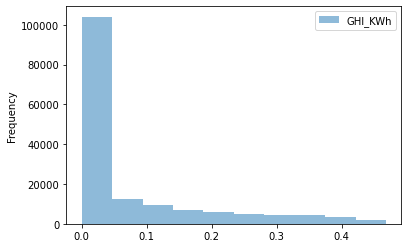

In [28]:
ax = solar_df[['GHI_KWh']].plot.hist(alpha=0.5)

In [29]:
#ax = solar_df[['GHI_KWh','Clearsky GHI_KWh']].plot.hist(alpha=0.5)

In [30]:
solar_df['Solar Energy'] = solar_df['GHI_KWh'] * 2 * 3 * 0.2
solar_df['Clearsky Solar Energy'] = solar_df['Clearsky GHI_KWh']  * 2 * 3 * 0.2

<ipython-input-30-8b999169b131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['Solar Energy'] = solar_df['GHI_KWh'] * 2 * 3 * 0.2
<ipython-input-30-8b999169b131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['Clearsky Solar Energy'] = solar_df['Clearsky GHI_KWh']  * 2 * 3 * 0.2


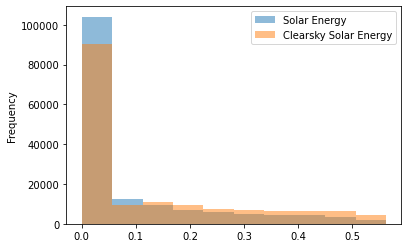

In [31]:
ax = solar_df[['Solar Energy', 'Clearsky Solar Energy']].plot.hist(alpha=0.5)

In [32]:
solar_df

,timestamp,GHI,Clearsky GHI,GHI_KWh,Clearsky GHI_KWh,Solar Energy,Clearsky Solar Energy
0,2012-01-01 00:00:00,0,0,0.0,0.0,0.0,0.0
1,2012-01-01 00:30:00,0,0,0.0,0.0,0.0,0.0
2,2012-01-01 01:00:00,0,0,0.0,0.0,0.0,0.0
3,2012-01-01 01:30:00,0,0,0.0,0.0,0.0,0.0
4,2012-01-01 02:00:00,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
157819,2020-12-31 21:30:00,0,0,0.0,0.0,0.0,0.0
157820,2020-12-31 22:00:00,0,0,0.0,0.0,0.0,0.0
157821,2020-12-31 22:30:00,0,0,0.0,0.0,0.0,0.0
157822,2020-12-31 23:00:00,0,0,0.0,0.0,0.0,0.0


### Wind Energy

https://www.thoughtco.com/density-of-air-at-stp-607546

https://www.google.com/search?q=mbar+to+Pa&oq=mbar+to+Pa&aqs=chrome..69i57j6j0i512l2j0i10i512j0i512j0i10i512.3157j0j7&sourceid=chrome&ie=UTF-8

https://www.toppr.com/guides/physics/fundamentals/density-of-air-how-to-calculate-air-density/#:~:text=Additionally%2C%20the%20IUPAC%20standard%20of,degrees%20C%20and%20100%20kPa


In [35]:
nsrdb_metadata_2018[nsrdb_metadata_2018.index.isin(['Wind Speed', 'Temperature Units', 'Pressure Units'])]

,0
Temperature Units,c
Pressure Units,mbar
Wind Speed,m/s


In [36]:
nsrdb = pd.concat([nsrdb_2012, nsrdb_2013, nsrdb_2014, nsrdb_2015, nsrdb_2016, nsrdb_2017, nsrdb_2018, nsrdb_2019, nsrdb_2020], ignore_index=True)
wind_df = nsrdb.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'Wind Speed', 'Temperature', 'Pressure']]
wind_df['timestamp'] = pd.to_datetime(wind_df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
wind_df = wind_df[['timestamp', 'Pressure', 'Temperature', 'Wind Speed']]
wind_df

,timestamp,Pressure,Temperature,Wind Speed
0,2012-01-01 00:00:00,1020,2.0,0.5
1,2012-01-01 00:30:00,1020,2.0,0.5
2,2012-01-01 01:00:00,1020,2.0,0.5
3,2012-01-01 01:30:00,1020,2.0,0.5
4,2012-01-01 02:00:00,1020,2.0,0.5
...,...,...,...,...
157819,2020-12-31 21:30:00,1002,9.8,1.0
157820,2020-12-31 22:00:00,1002,9.9,1.0
157821,2020-12-31 22:30:00,1002,9.9,1.0
157822,2020-12-31 23:00:00,1002,9.8,1.0


In [37]:
# Changing Pressure values to Pa from mbar
wind_df['Pressure'] = wind_df['Pressure'] * 100
# Converting Temperature to Kelvin
wind_df['Temperature'] = wind_df['Temperature'] + 273.15
# Wind speed is in m/s
# R is the specific gas constant for dry air in J/ (kg.K)
R = 287.058

In [38]:
wind_df

,timestamp,Pressure,Temperature,Wind Speed
0,2012-01-01 00:00:00,102000,275.15,0.5
1,2012-01-01 00:30:00,102000,275.15,0.5
2,2012-01-01 01:00:00,102000,275.15,0.5
3,2012-01-01 01:30:00,102000,275.15,0.5
4,2012-01-01 02:00:00,102000,275.15,0.5
...,...,...,...,...
157819,2020-12-31 21:30:00,100200,282.95,1.0
157820,2020-12-31 22:00:00,100200,283.05,1.0
157821,2020-12-31 22:30:00,100200,283.05,1.0
157822,2020-12-31 23:00:00,100200,282.95,1.0


In [39]:
# Air density = p/(R.T) 
# Air density in kg/m^3
wind_df['Air Density'] = wind_df['Pressure'] / (R * wind_df['Temperature'])
wind_df

,timestamp,Pressure,Temperature,Wind Speed,Air Density
0,2012-01-01 00:00:00,102000,275.15,0.5,1.291401
1,2012-01-01 00:30:00,102000,275.15,0.5,1.291401
2,2012-01-01 01:00:00,102000,275.15,0.5,1.291401
3,2012-01-01 01:30:00,102000,275.15,0.5,1.291401
4,2012-01-01 02:00:00,102000,275.15,0.5,1.291401
...,...,...,...,...,...
157819,2020-12-31 21:30:00,100200,282.95,1.0,1.233640
157820,2020-12-31 22:00:00,100200,283.05,1.0,1.233204
157821,2020-12-31 22:30:00,100200,283.05,1.0,1.233204
157822,2020-12-31 23:00:00,100200,282.95,1.0,1.233640


In [40]:
# A = pi * r ^ 2
# r = 44m
# A is in m^2
A = math.pi * 44 ** 2
A

6082.12337734984

#### Assumption for Cp 

https://greenliving.lovetoknow.com/Efficiency_of_Wind_Energy#:~:text=Wind%20energy%2C%20also%20known%20as,is%20between%2035%2D45%25

Research paper: Wind Turbine Power Calculations RWE npower renewables

In [41]:
# Power Coeffecient, Cp = ηWind =  0.4
Cp = 0.4

In [42]:
# Research paper: Wind Turbine Power Calculations RWE npower renewables
# P = (1/2) * air density * A * v^3 * Cp in watt
wind_df ['Wind Power'] = 0.5 * wind_df['Air Density'] * A * (wind_df['Wind Speed'] ** 3) * Cp

In [43]:
wind_df['Wind Energy'] = 0.5 * wind_df ['Wind Power'] / 1000
wind_df = wind_df[['timestamp', 'Wind Power', 'Wind Energy']]
wind_df

,timestamp,Wind Power,Wind Energy
0,2012-01-01 00:00:00,196.361452,0.098181
1,2012-01-01 00:30:00,196.361452,0.098181
2,2012-01-01 01:00:00,196.361452,0.098181
3,2012-01-01 01:30:00,196.361452,0.098181
4,2012-01-01 02:00:00,196.361452,0.098181
...,...,...,...
157819,2020-12-31 21:30:00,1500.629881,0.750315
157820,2020-12-31 22:00:00,1500.099716,0.750050
157821,2020-12-31 22:30:00,1500.099716,0.750050
157822,2020-12-31 23:00:00,1500.629881,0.750315


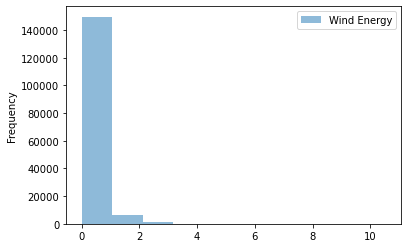

In [44]:
ax = wind_df[['Wind Energy']].plot.hist(alpha=0.5)

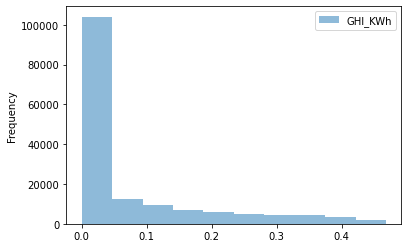

In [45]:
ax = solar_df[['GHI_KWh']].plot.hist(alpha=0.5)

In [46]:
21 / 0.5

42.0

### Creating cumulative datasets

In [47]:
solar_df = solar_df.set_index('timestamp')[['Solar Energy', 'Clearsky Solar Energy']]

In [48]:
wind_df = wind_df.set_index('timestamp')

In [49]:
wind_df

,Wind Power,Wind Energy
timestamp,,
2012-01-01 00:00:00,196.361452,0.098181
2012-01-01 00:30:00,196.361452,0.098181
2012-01-01 01:00:00,196.361452,0.098181
2012-01-01 01:30:00,196.361452,0.098181
2012-01-01 02:00:00,196.361452,0.098181
...,...,...
2020-12-31 21:30:00,1500.629881,0.750315
2020-12-31 22:00:00,1500.099716,0.750050
2020-12-31 22:30:00,1500.099716,0.750050


In [50]:
solar_df

,Solar Energy,Clearsky Solar Energy
timestamp,,
2012-01-01 00:00:00,0.0,0.0
2012-01-01 00:30:00,0.0,0.0
2012-01-01 01:00:00,0.0,0.0
2012-01-01 01:30:00,0.0,0.0
2012-01-01 02:00:00,0.0,0.0
...,...,...
2020-12-31 21:30:00,0.0,0.0
2020-12-31 22:00:00,0.0,0.0
2020-12-31 22:30:00,0.0,0.0


In [51]:
energy_generation_df = solar_df.join(wind_df)[['Wind Energy', 'Solar Energy']]

In [52]:
energy_generation_df.sample(50)
# All values in KWh

,Wind Energy,Solar Energy
timestamp,,
2020-12-02 02:00:00,0.577647,0.0000
2017-08-10 09:00:00,0.000725,0.2574
2015-08-24 00:30:00,0.094078,0.0000
2012-09-13 19:00:00,0.019905,0.0000
2017-01-25 19:00:00,0.782602,0.0000
2014-05-28 01:00:00,0.095407,0.0000
2015-09-27 21:00:00,0.763254,0.0000
2015-10-23 23:30:00,0.166628,0.0000
2017-12-24 19:00:00,0.271381,0.0000


In [54]:
energy_generation_df

,Wind Energy,Solar Energy
timestamp,,
2012-01-01 00:00:00,0.098181,0.0
2012-01-01 00:30:00,0.098181,0.0
2012-01-01 01:00:00,0.098181,0.0
2012-01-01 01:30:00,0.098181,0.0
2012-01-01 02:00:00,0.098181,0.0
...,...,...
2020-12-31 21:30:00,0.750315,0.0
2020-12-31 22:00:00,0.750050,0.0
2020-12-31 22:30:00,0.750050,0.0


In [58]:
energy_generation_df['timestamp'] = pd.DatetimeIndex(energy_generation_df.index)
energy_generation_df = energy_generation_df.resample('H', on='timestamp').sum()
energy_generation_df

,Wind Energy,Solar Energy
timestamp,,
2012-01-01 00:00:00,0.196361,0.0
2012-01-01 01:00:00,0.196361,0.0
2012-01-01 02:00:00,0.196361,0.0
2012-01-01 03:00:00,0.196361,0.0
2012-01-01 04:00:00,0.196361,0.0
...,...,...
2020-12-31 19:00:00,1.996050,0.0
2020-12-31 20:00:00,1.996050,0.0
2020-12-31 21:00:00,1.747987,0.0


In [59]:
energy_generation_df.to_csv('Final Datasets/energy_generation.csv')